# About Dataset


This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.The company is trying to decide whether to focus their efforts on their mobile app experience or their website.


# The puropse of the project

The main goal is to support business decisions regarding the further development of the brand on the e-commerce market using statistical algorithm.

My personal objective is to explain how linear regression works.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import math

import warnings
warnings.filterwarnings("ignore")

# Data import

In [2]:
df = pd.read_csv("/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers")
#/kaggle/input/focusing-on-mobile-app-or-website

# Data Overview

In [3]:
df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
duplicatedRows = df[df.duplicated()]
print(duplicatedRows)

Empty DataFrame
Columns: [Email, Address, Avatar, Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent]
Index: []


**The dataset contains 500 observations and 8 features. The are no missing vales or duplicated rows. The first 3 attributes describe the user account and are not involved in modeling. The next 5 attributes expressed as numerical(floats), describe the relationship between user and the brand.**
**Given the business objective, I need to predict the Yearly Amount Spent — this is the target variable that depends on the other independent variables.**

In [7]:
df['Yearly Amount Spent'].describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64


**Let's take a closer look at each of the distributions of numerical variables:**

In [8]:
def plot_var(df_var):
    plt.figure(figsize = (18,7))
    
    sns.set_style("dark")
    plt.subplot(121)
    sns.distplot(df_var);
    
    plt.subplot(122)
    df_var.plot.box()
    
    plt.show()

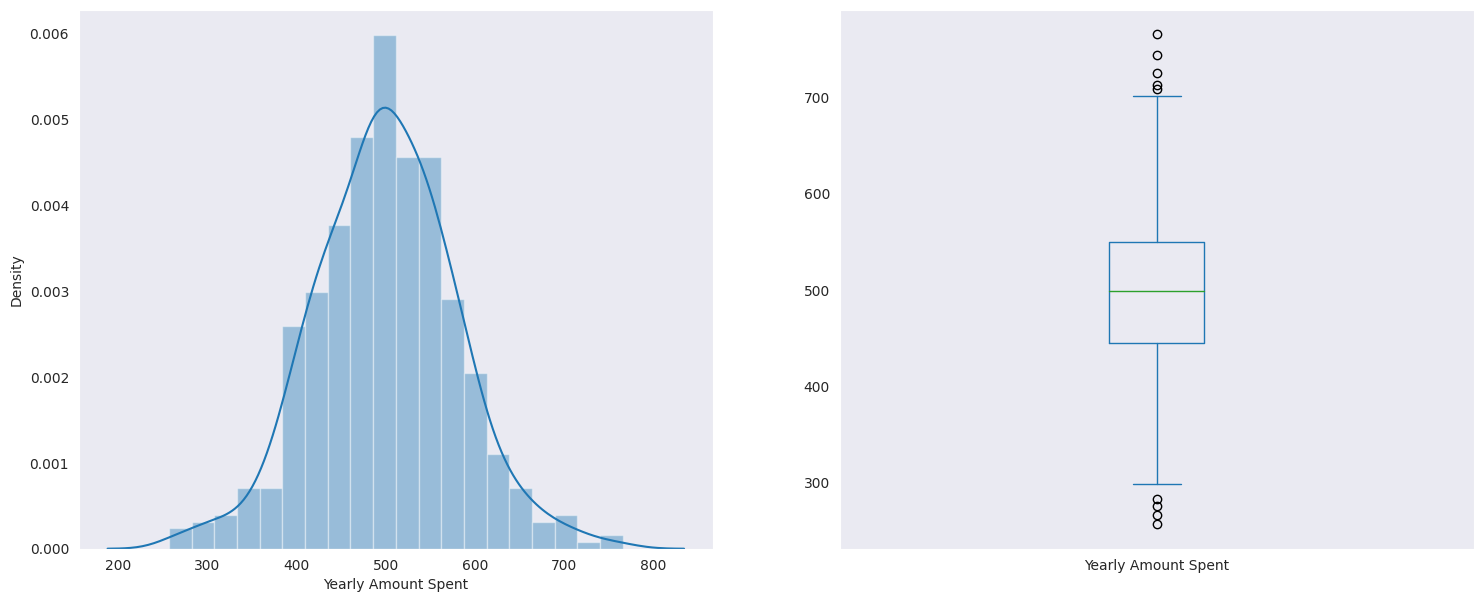

In [9]:
plot_var(df['Yearly Amount Spent'])

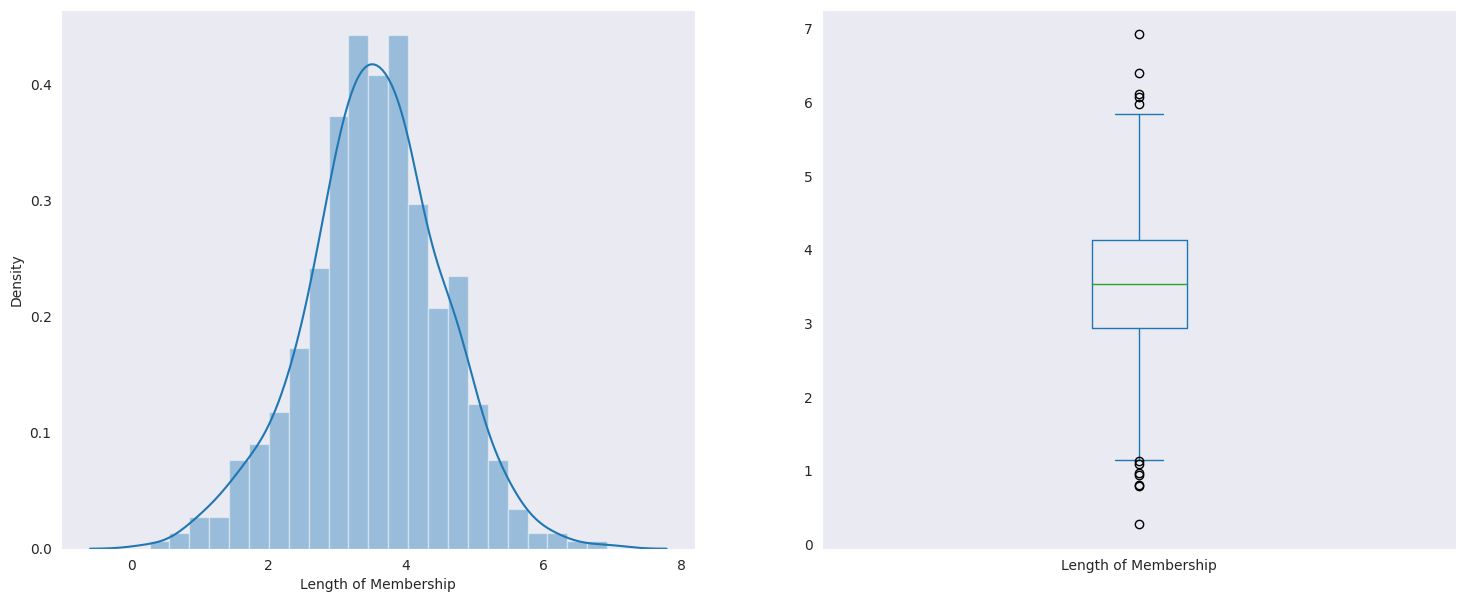

In [10]:
plot_var(df['Length of Membership'])

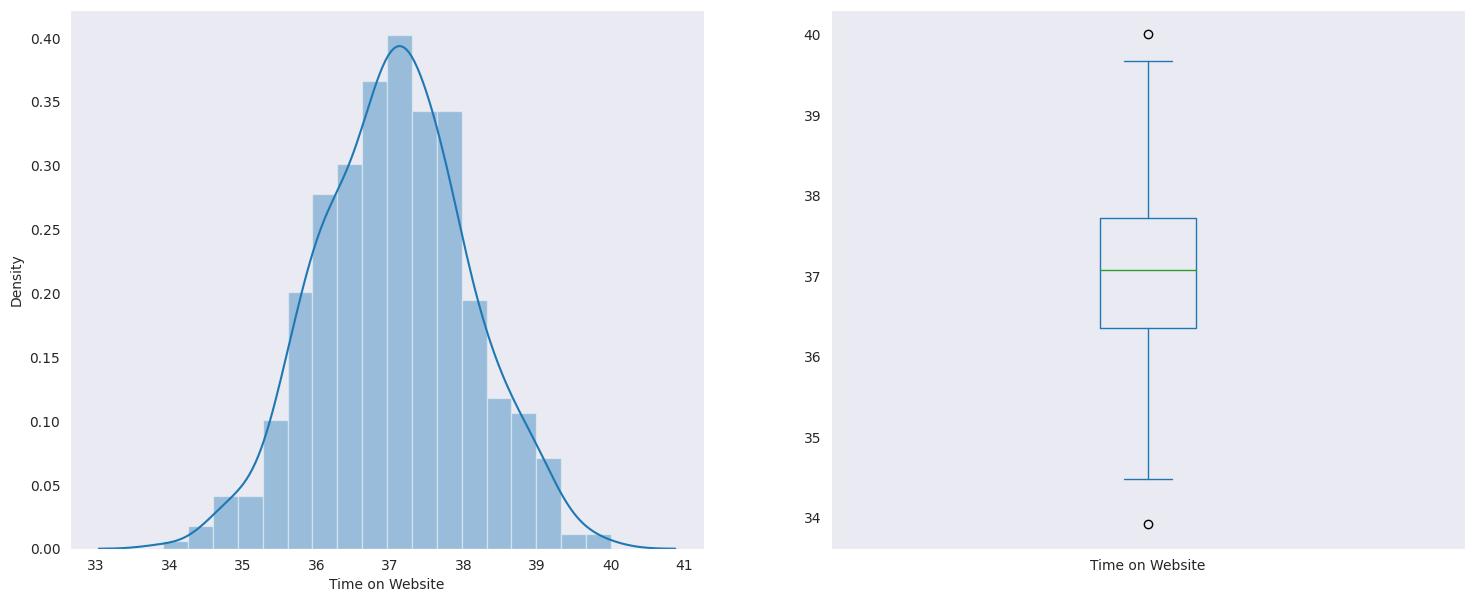

In [11]:
plot_var(df['Time on Website'])

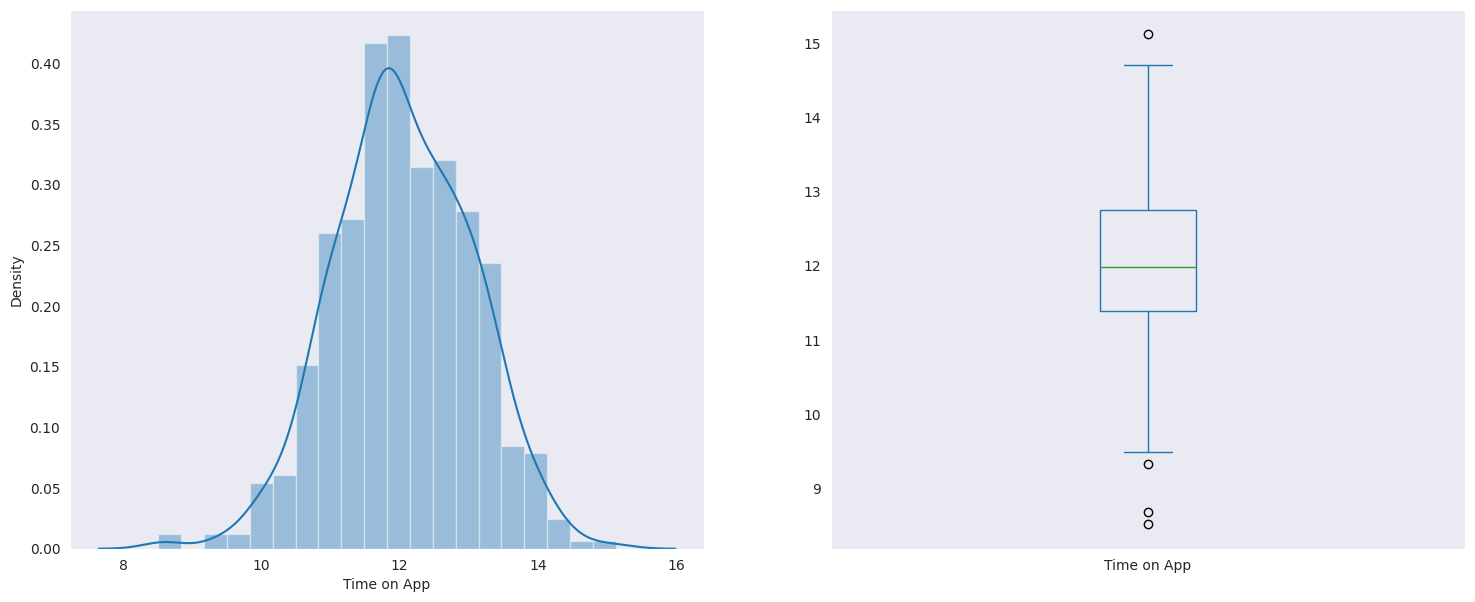

In [12]:
plot_var(df['Time on App'])

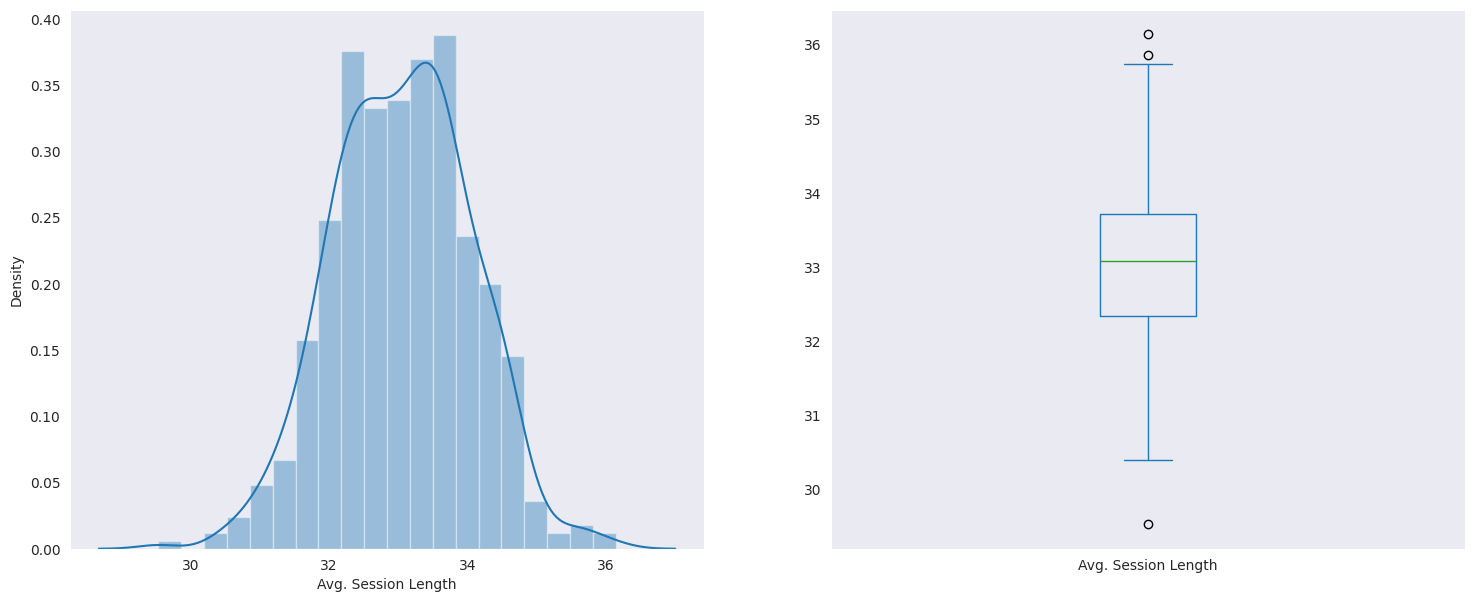

In [13]:
plot_var(df['Avg. Session Length'])

**Each of the variable are normally distributed with some outliers. 
It seems good for the modeling.**






**The graph below illustrates the correlation between variables:**

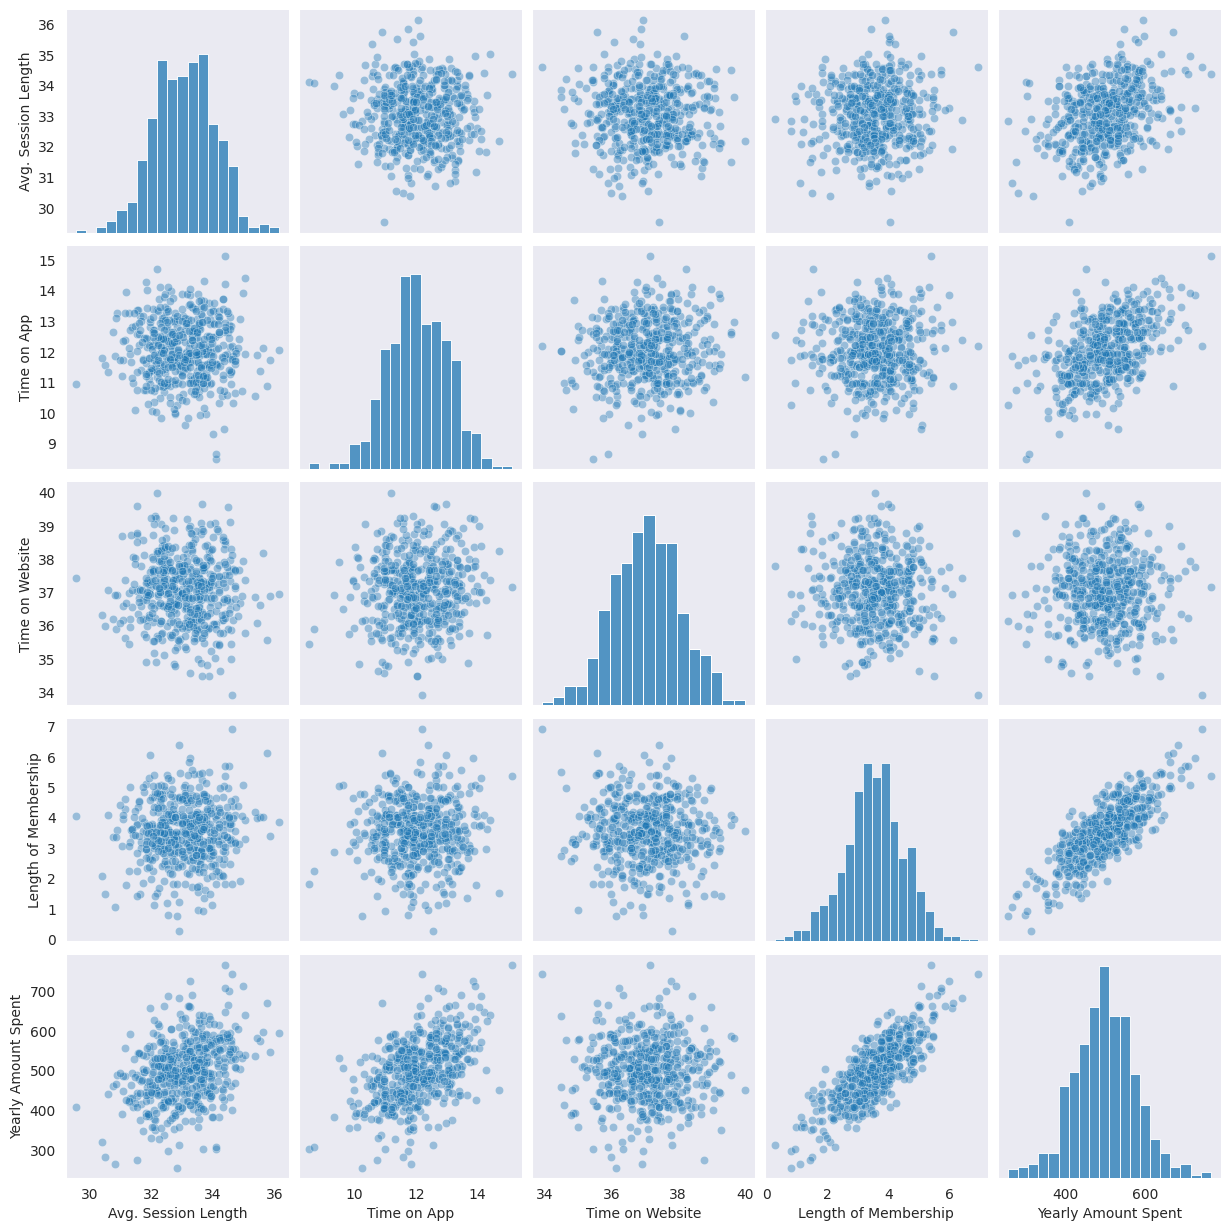

In [14]:
sns.pairplot(df, kind = "scatter", plot_kws={'alpha': 0.4})

**At first glance, there are no strong correlations between the independent variables. The most visible relationship is between the dependent variable and Length of Membership.**

**Split data into train, test sets.**

In [15]:
y = df['Yearly Amount Spent']
X = df.drop(['Yearly Amount Spent', 'Email', 'Avatar', 'Address'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print(X_train)



Training set shape: (400, 4) (400,)
Testing set shape: (100, 4) (100,)
     Avg. Session Length  Time on App  Time on Website  Length of Membership
161            33.503705    12.399436        35.012806              0.968622
72             32.386252    10.674653        38.006583              3.401522
246            31.909627    11.347264        36.323652              5.314354
230            32.351478    13.105159        35.574842              3.641497
391            33.481931    11.918670        37.317705              3.336339
..                   ...          ...              ...                   ...
63             32.789773    11.670066        37.408748              3.414688
326            33.217188    10.999684        38.442767              4.243813
337            31.827979    12.461147        37.428997              2.974737
11             33.879361    11.584783        37.087926              3.713209
351            32.189845    11.386776        38.197483              4.808320

[400

# Modeling, first approach


**Ordinary Least Squares (OLS) is an essential technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable. The OLS method aims to minimize the sum of square differences between the observed and predicted values, considering potential issues of multicollinearity.**


In [16]:
X_train1 = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, X_train1).fit()

print(model_1.summary(), '\n')
print('Coefficients:','\n',model_1.params, '\n')
print('p-value:','\n',np.round(model_1.pvalues,6))

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     5683.
Date:                 Mon, 06 Jan 2025   Prob (F-statistic):               0.00
Time:                         16:24:29   Log-Likelihood:                -1489.4
No. Observations:                  400   AIC:                             2989.
Df Residuals:                      395   BIC:                             3009.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -



**Despite the high coefficient of determination (R2 = 0.98), the model returns the warning:**


*The condition number is large. This might indicate that there arestrong multicollinearity or other numerical problems.*


# Checking VIF

**Variance Inflation Factor, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test linear model, so I hope that helps me resolve the problem.**

VIF = 1: no multicollinearity

VIF between 1 and 5: moderate multicollinearity

VIF > 5: high multicollinearity

VIF > 10: strong multicollinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc(df_vif):
    dv = pd.DataFrame()
    dv['feature']= df_vif.columns
    dv['vif'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
    return dv


In [18]:
vif_calc(X_train1)

,feature,vif
0,const,2598.822922
1,Avg. Session Length,1.006403
2,Time on App,1.011193
3,Time on Website,1.007737
4,Length of Membership,1.002747



**There is no multicollinearity, so I'll try handle with this issue in a different way.**

**I'll test few models by recursively removing variables considering coefficients and p-values.**

**Based on the  model_1 results I can see that Time on Website is a non-significant variable so I'll drop it first.**


# Second approach

In [19]:
features = ['Avg. Session Length','Time on App','Length of Membership']
X_train2 = sm.add_constant(X_train[features])
model_2 = sm.OLS(y_train, X_train2).fit()

print(model_2.summary(), '\n')
print('Coefficients:','\n',model_2.params)

vif_calc(X_train2)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     7588.
Date:                 Mon, 06 Jan 2025   Prob (F-statistic):               0.00
Time:                         16:24:29   Log-Likelihood:                -1489.6
No. Observations:                  400   AIC:                             2987.
Df Residuals:                      396   BIC:                             3003.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

,feature,vif
0,const,1292.693500
1,Avg. Session Length,1.006058
2,Time on App,1.004262
3,Length of Membership,1.002003


**The model_2 is strong, there is no multicollinearity, but the numerical problem still appears.**

In [20]:
features = ['Time on App','Length of Membership']
X_train3 = sm.add_constant(X_train[features])
model_3 = sm.OLS(y_train, X_train3).fit()

print(model_3.summary(), '\n')
print('Coefficients:','\n',model_3.params)

vif_calc(X_train3)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.866
Model:                             OLS   Adj. R-squared:                  0.866
Method:                  Least Squares   F-statistic:                     1286.
Date:                 Mon, 06 Jan 2025   Prob (F-statistic):          3.76e-174
Time:                         16:24:30   Log-Likelihood:                -1901.0
No. Observations:                  400   AIC:                             3808.
Df Residuals:                      397   BIC:                             3820.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

,feature,vif
0,const,169.861397
1,Time on App,1.000079
2,Length of Membership,1.000079


**In model_3, with two most significant variables, the nummerical problem disappeared but the quality also decreased.**

**My idea is to transform independent variables**

In [21]:
#X_train.head(3)

# Third approach

**I choose MinMaxScaler because it does not reduce the impact of outliers, but rather linearly scales them down to a fixed range where the largest data point occurring corresponds to the maximum value and the smallest corresponds to the minimum value.**

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['Avg. Session Length','Time on App','Time on Website','Length of Membership']
X_train_trans = X_train.copy()
X_test_trans = X_test.copy()
X_train_trans[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_trans[num_vars] = scaler.transform(X_test[num_vars])

#X_train_trans = scaler.fit_transform(X_train[num_vars])
#X_test_trans = scaler.transform(X_test[num_vars])
#X_train_trans = pd.DataFrame(X_train_trans, columns = num_vars )
#X_test_trans = pd.DataFrame(X_test_trans, columns = num_vars )

X_train_trans

,Avg. Session Length,Time on App,Time on Website,Length of Membership
161,0.541292,0.668892,0.103148,0.113959
72,0.346833,0.372411,0.679350,0.510757
246,0.263891,0.488029,0.355442,0.822734
230,0.340782,0.790203,0.211321,0.549897
391,0.537502,0.586251,0.546764,0.500126
...,...,...,...,...
63,0.417053,0.543517,0.564286,0.512905
326,0.491432,0.428282,0.763300,0.648132
337,0.249682,0.679500,0.568184,0.441150
11,0.606663,0.528858,0.502539,0.561593


**I repeat the steps from the beginning**

In [23]:
X_train5 = sm.add_constant(X_train_trans)
model_5 = sm.OLS(y_train, X_train5).fit()

print(model_5.summary(), '\n')
print('Coefficients:','\n',model_5.params, '\n')
print('p-value:','\n',np.round(model_5.pvalues,6))

vif_calc(X_train5)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     5683.
Date:                 Mon, 06 Jan 2025   Prob (F-statistic):               0.00
Time:                         16:24:30   Log-Likelihood:                -1489.4
No. Observations:                  400   AIC:                             2989.
Df Residuals:                      395   BIC:                             3009.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

,feature,vif
0,const,37.999939
1,Avg. Session Length,1.006403
2,Time on App,1.011193
3,Time on Website,1.007737
4,Length of Membership,1.002747


**Model_5 is strong, transformation resolved the numeriacal problem, there is no multicollinearity, one variable is non significant.**

In [24]:
features = ['Avg. Session Length','Time on App','Length of Membership']
X_train6 = sm.add_constant(X_train_trans[features])
model_6 = sm.OLS(y_train, X_train6).fit()

print(model_6.summary(), '\n')
print('Coefficients:','\n',model_6.params)

vif_calc(X_train6)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     7588.
Date:                 Mon, 06 Jan 2025   Prob (F-statistic):               0.00
Time:                         16:24:30   Log-Likelihood:                -1489.6
No. Observations:                  400   AIC:                             2987.
Df Residuals:                      396   BIC:                             3003.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

,feature,vif
0,const,32.465886
1,Avg. Session Length,1.006058
2,Time on App,1.004262
3,Length of Membership,1.002003


**Model_6 meets expectations.**

# Prediction and evaluation

In [25]:
#X_test[features].head()
#X_train6.head()

In [26]:
X_test6 = sm.add_constant(X_test_trans[features])
y_pred = model_6.predict(X_test6)

RF_r2 = r2_score(y_test,y_pred) 
MSE = mean_squared_error(y_test,y_pred) 
RMSE = np.sqrt(MSE)

print('Coefficient of determination: ',RF_r2) 
#print(MSE) 
print('Root mean squared error: ', RMSE)

Coefficient of determination:  0.9881051319836207
Root mean squared error:  9.607115279467468



**The accuracy(R2) of the model on test set is very good: 0.98** 

**Root mean squared error means that average difference between a statistical model's predicted values and the actual values is 9.6 - the Amount Spent Yearly in this case.**

**Let's look at the residuals distribution and at the actual and predicted values in the graphs:**


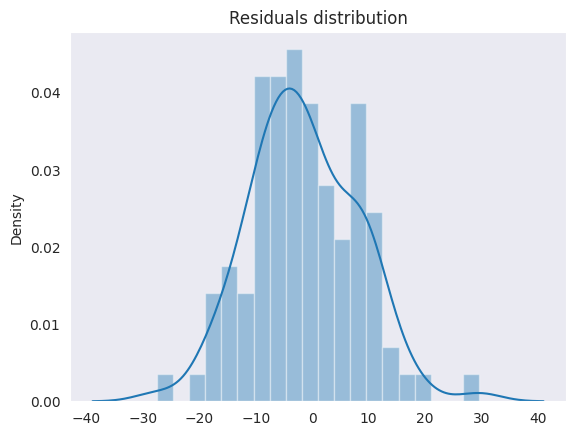

In [27]:
sns.distplot((y_test-y_pred),bins=20).set(title = 'Residuals distribution')
plt.show()

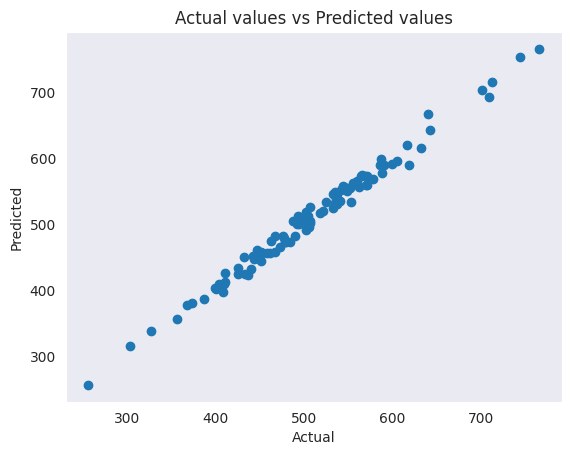

In [28]:
plt.scatter(y_test,y_pred) 
plt.xlabel('Actual') 
plt.ylabel('Predicted') 
plt.title('Actual values vs Predicted values') 
plt.show()


**The plot_regress_exog (bellow) is a convenience function for quickly checking modeling assumptions with respect to a single regressor, containing:**
* **Fit plot**, the dependent variable and fitted values with confidence intervals vs. the independent variable chosen,
* **Residuals plot**, the residuals of the model vs. the chosen independent variable,
* **Partial regression plot**, that shows the effect of adding the variable to a model that already has one or more independent variables
* **CCPR plot**, that shows the effect of one regressor on the response variable by taking into account the effects of the other independent variables.



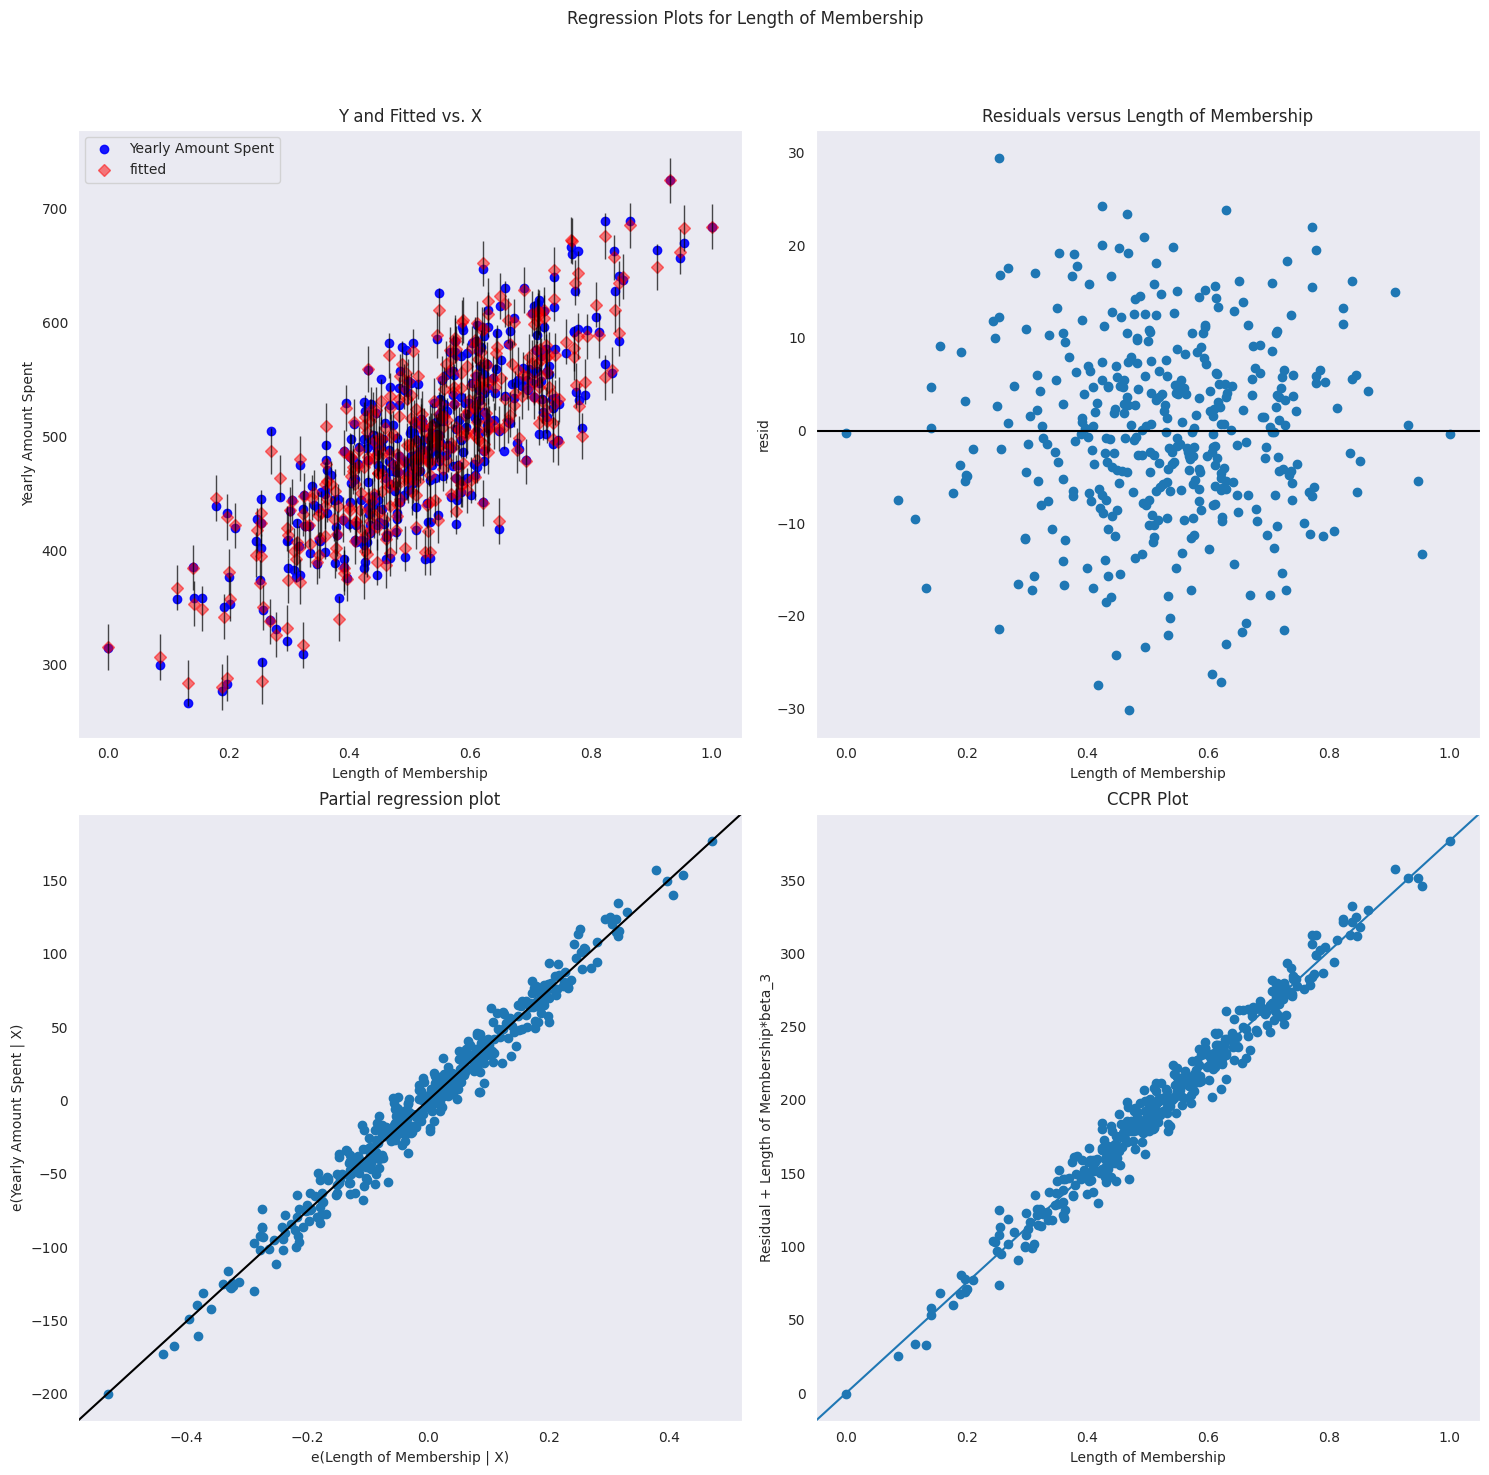

In [29]:
fig = plt.figure(figsize = (15,15 ))
fig = sm.graphics.plot_regress_exog(model_6,'Length of Membership', fig = fig )
plt.show()

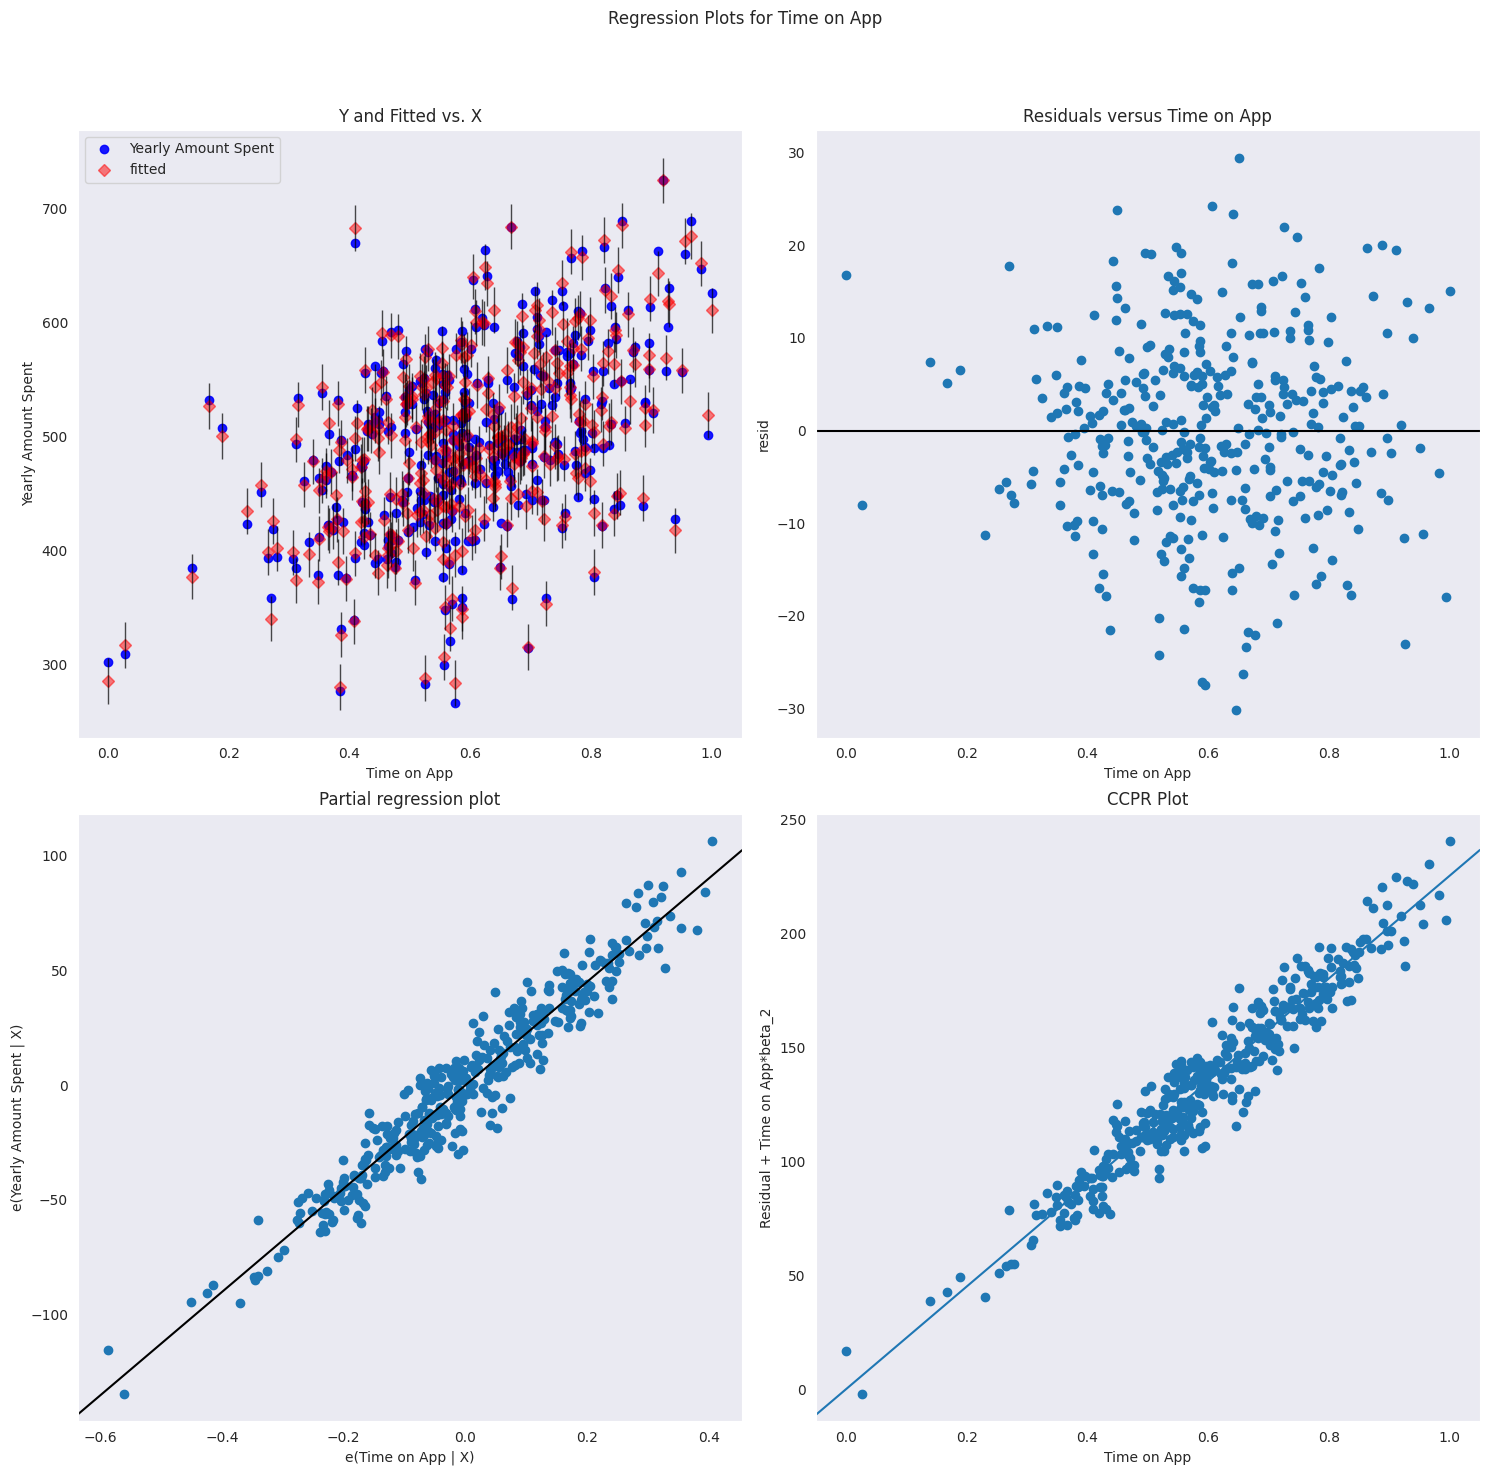

In [30]:
fig = plt.figure(figsize = (15,15 ))
fig = sm.graphics.plot_regress_exog(model_6,'Time on App', fig = fig )
plt.show()

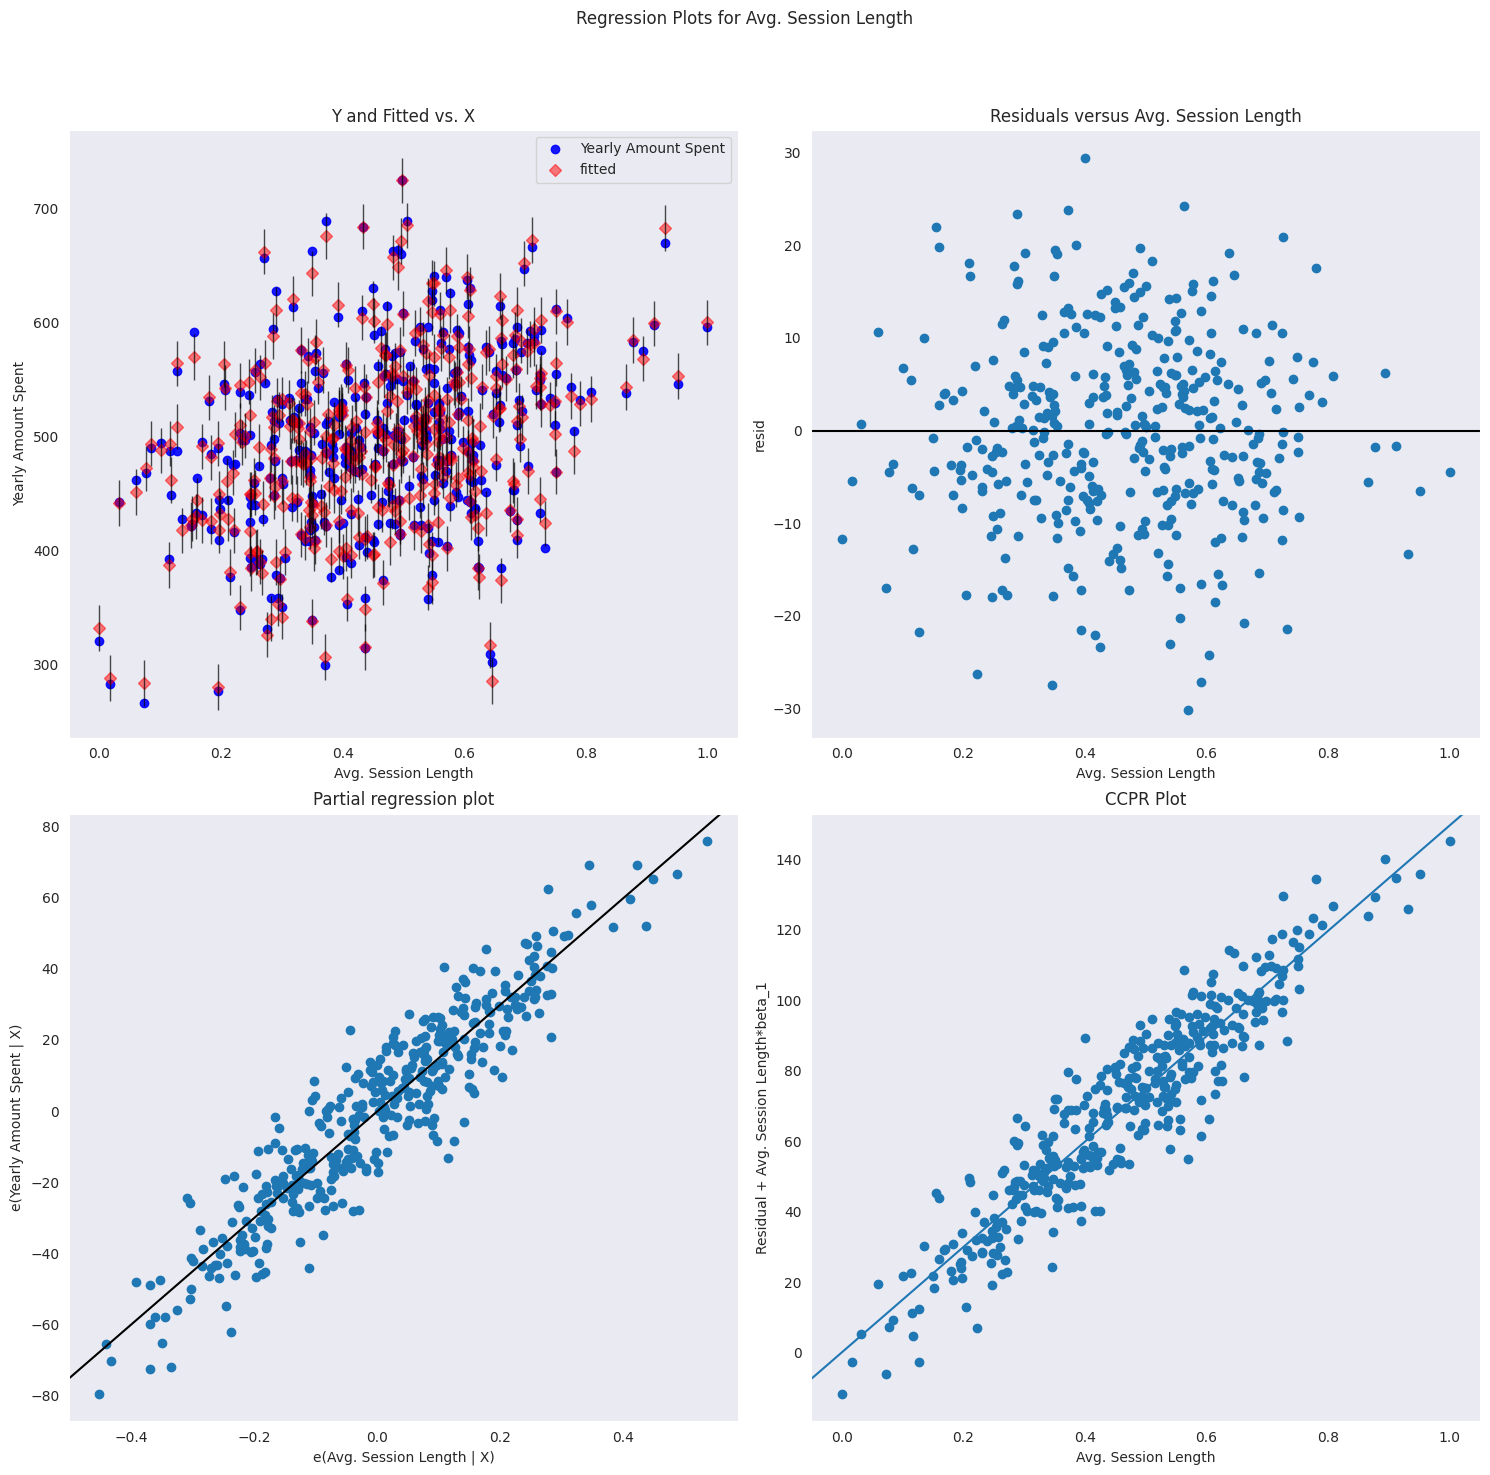

In [31]:
fig = plt.figure(figsize = (15,15 ))
fig = sm.graphics.plot_regress_exog(model_6,'Avg. Session Length', fig = fig )
plt.show()

**When interpreting the above graphs, it should be remembered that the values of the independent variables have been transformed for the purpose of modeling. However, when comparing the graphs for regressors, we can see that Length of Membership is the most influencial feature which is consistent with the values of the regression coefficients. In the model_6 the coefficient for Length of Membership = 376.9 which means that increasing the Length of Membership by 1 the Yearly Amount Spent growing by 376.9, in this case 1 is the maximum value due to scaling.**

**When it comes to deciding the key issue regarding the development of sales channels, the model indicates that the App is definitely more promising.**